In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import preprocessing

# READING DATA

In [4]:
data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/haberman.xlsx')
display(data)

,X1,X2,X3,Y
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


# CHECKING FOR MISSING VALUES

In [5]:
for col in data.columns.values:
    
    # Getting list of unique values in each column
    unique_list = pd.unique(data[col])

    print("Datatype of {} is: ".format(col), data[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))

    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(data[col])

    # Calculating total null values
    total_null = np.sum(is_null)

    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), data[col].shape[0] - total_null)

    print("---------------")

Datatype of X1 is:  int64
Number of unique values for X1 are:  49
Number of missing entries for X1 are:  0
Number of non-missing entries for X1 are:  306
---------------
Datatype of X2 is:  int64
Number of unique values for X2 are:  12
Number of missing entries for X2 are:  0
Number of non-missing entries for X2 are:  306
---------------
Datatype of X3 is:  int64
Number of unique values for X3 are:  31
Number of missing entries for X3 are:  0
Number of non-missing entries for X3 are:  306
---------------
Datatype of Y is:  int64
Number of unique values for Y are:  2
Number of missing entries for Y are:  0
Number of non-missing entries for Y are:  306
---------------


# CORRELATION MATRIX

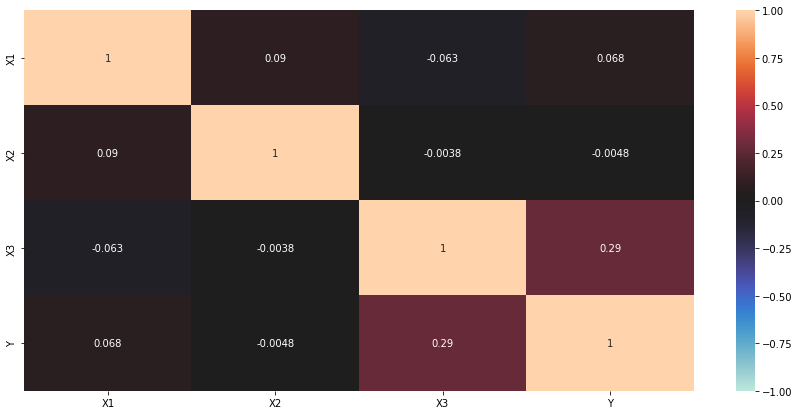

In [6]:
plt.figure(figsize = (15, 7))

# Calculating correlation between all columns
var_corr = data.corr()

# Plotting correlation heatmap
sns.heatmap(var_corr, xticklabels = var_corr.columns, yticklabels = var_corr.columns, annot = True, vmin=-1, vmax=1, center= 0)

# PRE-PROCESSING

In [8]:
# Extracting the label column
Y = data['Y']

# Dropping the label column from the main dataset
data = data.drop('Y', axis = 1)
display(data)

,X1,X2,X3
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
...,...,...,...
301,75,62,1
302,76,67,0
303,77,65,3
304,78,65,1


In [10]:
# Converting the data into numpy arrays
X = np.array(data)
Y = np.array(Y)

print(X.shape)
print(Y.shape)

(306, 3)
(306,)


# TRAIN -TEST SPLIT FUNCTION

In [11]:
# Splitting the data into train and test sets
def data_split(test_split = 0.2):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_split, shuffle = True)
    return X_train, X_test, Y_train, Y_test

# LOGISTIC REGRESSION FUNCTION

In [12]:
from sklearn.linear_model import LogisticRegression

'''
A function to carry out logistic regression

Here, C is a parameter which specifies the inverse of the regularization strength, in a sense
So, smaller values of C lead to stronger regularization
'''

def logistic_regression(X, Y, reg_inverse = 1.0, penalty = 'l2'):

    clf = LogisticRegression(penalty = penalty, C = reg_inverse).fit(X, Y)
    return clf

# CLASSIFICATION ERROR FUNCTION

In [13]:
def classification_error(Y_pred, Y_actual):

    # Total test values
    total_entries = len(Y_pred)
    
    # Number of values wrongly predicted by the model
    wrong_values = 0
    
    for i in range(total_entries):

        if Y_pred[i] != Y_actual[i]:
            wrong_values += 1

    error = float(wrong_values)/float(total_entries)
    return error

# LOGISTIC REGRESSION WITH VARYING TRAIN-TEST SPLIT AND REGULARISATION STRENGTH

In [14]:
# Possible train-test splits
test_splits = [0.1, 0.2, 0.3, 0.4]

# Possible values of the inverse of the regularization strength
reg_inverse_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

for test_split in test_splits:

    for reg_inverse_value in reg_inverse_values:

        print(f"Test Split Value: {test_split}")
        print(f"Regularization Strength: {1/reg_inverse_value}")
        
        X_train, X_test, Y_train, Y_test = data_split(test_split = test_split)
        
        # Normalizing the different features in the data
        X_train = preprocessing.scale(X_train)
        X_test = preprocessing.scale(X_test)
        
        # Fitting the data to the logistic regression model
        clf = logistic_regression(X_train, Y_train)
        
        # Extract the coefficients of the trained logistic model
        coef = clf.coef_

        # Extract the intercept of the trained logistic model
        intercept = clf.intercept_

        print(f"Coefficients of the trained logistic model are: {coef}")
        print(f"Intercept of the trained logistic model is: {intercept}")

        # Carrying out predictions on the test data
        Y_pred = clf.predict(X_test)
        print(f"The predicted survival status of the patients in the test dataset sre: {Y_pred}")

        # Computing the error in the predicted values
        error = classification_error(Y_pred, Y_test)
        print(f"The classification error in the test data prediction is: {error} \n")

        print("----------\n")

Test Split Value: 0.1
Regularization Strength: 100.0
Coefficients of the trained logistic model are: [[ 0.22521022 -0.01550829  0.72872251]]
Intercept of the trained logistic model is: [-1.06186171]
The predicted survival status of the patients in the test dataset sre: [1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The classification error in the test data prediction is: 0.22580645161290322 

----------

Test Split Value: 0.1
Regularization Strength: 33.333333333333336
Coefficients of the trained logistic model are: [[0.22904658 0.00733051 0.55583078]]
Intercept of the trained logistic model is: [-1.02724263]
The predicted survival status of the patients in the test dataset sre: [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1]
The classification error in the test data prediction is: 0.16129032258064516 

----------

Test Split Value: 0.1
Regularization Strength: 10.0
Coefficients of the trained logistic model are: [[ 0.19615663 -0.03470716  0.64269005]]
